# Helpful Links
Tutorial provided by Professor Chanin Nantasenamat. 

[Data Professor YouTube Channel](https://www.youtube.com/dataprofessor/)

[Link to YouTube Tutorial](https://www.youtube.com/watch?v=jBlTQjcKuaY&t=640s)


*First modified: 29 May 2022*

*Last modified: 29 May 2022* 	

# Purpose of notebook
This notebook builds a regression model of acetylcholinerase inhibitors using the random forest algorithm.

# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load dataset

Contains the bioactivity data for the acetylcholinesterase inhibitors. 

In [16]:
filepath = "/content/drive/MyDrive/FCC Python for Bioinformatics/"

df = pd.read_csv(filepath + "data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 31.6 MB


In [18]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


# Input features
The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

In [19]:
X = df.drop('pIC50', axis=1)
Y = df["pIC50"]

print(X.shape)
print(Y.shape)

(4695, 881)
(4695,)


## Remove low variance features
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

Features with a training-set variance lower than this threshold will be removed. The default is to keep all features with non-zero variance, i.e. remove the features that have the same value in all samples.

In [20]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [21]:
X.shape

(4695, 137)

# Data split (80/20 ratio)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [25]:
X_test.shape, Y_test.shape

((939, 137), (939,))

# Building a regression model using Random Forest

In [26]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5266438817637152

In [27]:
Y_pred = model.predict(X_test)

# Scatter Plot of Experimental vs Predicted pIC50 Values

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

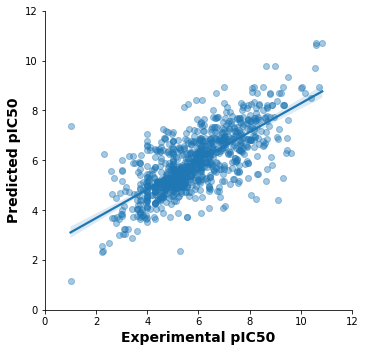

In [29]:
fig, ax = plt.subplots(
    nrows = 1,
    ncols = 1,
    figsize = (5.5, 5.5)
)

ax = sns.regplot(
    x = Y_test, 
    y = Y_pred,
    scatter_kws={'alpha':0.4}
)

ax.set_xlabel("Experimental pIC50", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Predicted pIC50", fontsize = 14, fontweight = "bold")

ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.savefig(
    "/content/drive/MyDrive/FCC Python for Bioinformatics/figures/Part04/Experimental_vs_pred_pIC50_values.png",
    bbox_inches = "tight"
)